In [1]:
import numpy as np
import matplotlib.pyplot as pl
import math
import pandas as pd
import scipy.optimize as op
import scipy.stats
from scipy.optimize import curve_fit
import scipy.io
import glob
import os
from fnmatch import fnmatch
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
def yMagnitude(t): #define M_y in rotating frame
    w0 = 1#0# (for relative phase, set it to zero)
    #w =dB*gamma #larmor frequency in cycle/second
    My = np.cos(2*np.pi*w0*t)
    return My
def xMagnitude(t): #define M_x in rotating frame
    w0 = 1#0# (for relative phase, set it to zero)
    #w = dB*gamma #larmor frequency in cycle/second
    Mx = -np.sin(2*np.pi*w0*t)
    return Mx

def run(t):
    My = yMagnitude(t)
    Mx = xMagnitude(t)
    return Mx,My

# Just basic oscillation without relaxation

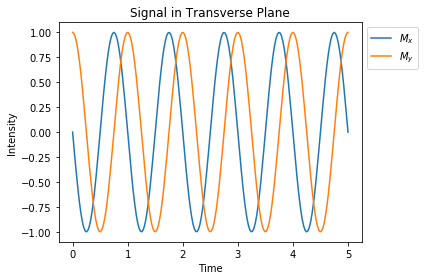

In [3]:
ts2 = np.linspace(0,5,200) #for 2 seconds
[Mx,My] = run(ts2)

pl.plot(ts2, Mx,label = '$M_x$')
pl.plot(ts2,My,label = '$M_y$')
pl.legend()
pl.ylabel('Intensity')
pl.xlabel('Time')
pl.title('Signal in Transverse Plane')
pl.legend(bbox_to_anchor=(1, 1))
pl.tight_layout()
pl.savefig('/Users/neuroimaging/Desktop/Oscillation.png',format='png',dpi=120)
pl.show()

# With T1 taken into account

In [4]:
def Mz_T1 (t,T1):
    Mz = 1-np.exp(-t/T1)
    return Mz

def Mxy_T1(t,T1):
    Mxy = np.sqrt(1-(1-np.exp(-t/T1)))
    return Mxy

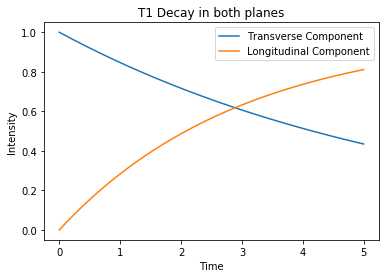

In [5]:
#With T2 = 2
Mxy_1 = Mxy_T1(ts2,3)
Mz = Mz_T1(ts2,3)
pl.plot(ts2,Mxy_1,label = 'Transverse Component')
pl.plot(ts2,Mz,label = 'Longitudinal Component')
pl.ylabel('Intensity')
pl.xlabel('Time')
pl.title('T1 Decay in both planes')
pl.legend()
pl.show()

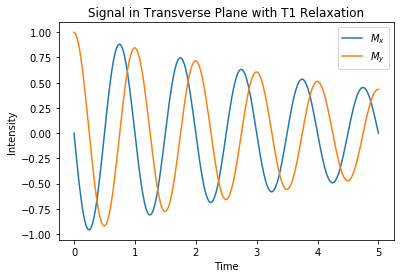

In [7]:
pl.plot(ts2, Mx*Mxy_1,label = '$M_x$')
pl.plot(ts2, My*Mxy_1,label = '$M_y$')
pl.legend()
pl.ylabel('Intensity')
pl.xlabel('Time')
pl.title('Signal in Transverse Plane with T1 Relaxation')
pl.savefig('/Users/neuroimaging/Desktop/T1Oscillation.png',format='png',dpi=120)

pl.show()

# With T2 decay included


In [8]:
def Mxy_T2(t,T2):
    Mxy = np.exp(-t/T2)
    return Mxy

In [9]:
#With T2 = 1.5
Mxy_2 = Mxy_T2(ts2,2.5)

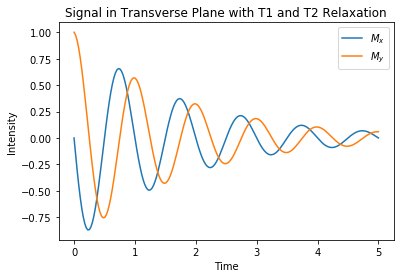

In [10]:
[Mx,My] = run(ts2)

pl.plot(ts2, Mx*Mxy_1*Mxy_2,label = '$M_x$')
pl.plot(ts2, My*Mxy_1*Mxy_2,label = '$M_y$')
pl.legend()
pl.ylabel('Intensity')
pl.xlabel('Time')
pl.title('Signal in Transverse Plane with T1 and T2 Relaxation')
pl.savefig('/Users/neuroimaging/Desktop/T2Oscillation.png',format='png',dpi=120)

pl.show()

# Showing this in 3D lab frame 

In [11]:
def M_3D(t,T1,T2):
    #oscillation
    [Mx,My] = run(ts2)
    #t1 decay
    Mxy_1 = Mxy_T1(ts2,2)
    Mz = Mz_T1(ts2,2)
    #t2 decay
    Mxy_2 = Mxy_T2(ts2,1.5)
    #combine all
    Mx_3d = Mx*Mxy_1*Mxy_2
    My_3d = My*Mxy_1*Mxy_2
    Mz_3d = Mz
    return Mx_3d, My_3d, Mz_3d

def yMagnitude(t): #define M_y in rotating frame
    w0 = 1#0# (for relative phase, set it to zero)
    #w =dB*gamma #larmor frequency in cycle/second
    My = np.cos(2*np.pi*w0*t-np.pi)
    return My
def xMagnitude(t): #define M_x in rotating frame
    w0 = 1#0# (for relative phase, set it to zero)
    #w = dB*gamma #larmor frequency in cycle/second
    Mx = -np.sin(2*np.pi*w0*t-np.pi)
    return Mx

def run(t):
    My = yMagnitude(t)
    Mx = xMagnitude(t)
    return Mx,My

In [12]:
ts2 = np.linspace(0,5,200) #for 2 seconds
T1 = 40
T2 = 38
[Mx_3d, My_3d, Mz_3d] = M_3D(ts2,T1,T2)

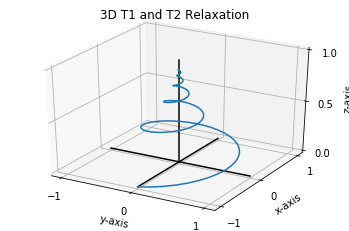

In [13]:
fig = pl.figure()
ax = fig.gca(projection = '3d')#pl.axes(projection='3d')

#get center axis
xy = np.linspace(-1,1,10)
z = np.linspace(0,1,10)
zeros = np.zeros(10)
ax.plot(xy,zeros,zeros,color = 'black')
ax.plot(zeros,xy,zeros,color = 'black')
ax.plot(zeros,zeros,z,color = 'black')

#splot signal in 3d lab frame
ax.plot(Mx_3d, My_3d, Mz_3d)

#set labels
ax.set_ylabel('x-axis') #THESE AXES ARE SWITCHED with that added np.pi phase to make it look better
ax.set_xlabel('y-axis')
ax.set_zlabel('z-axis')
#set axis labels
ax.set_zticks([0, .5, 1])
ax.set_xticks([-1.0, 0, 1.0])
ax.set_yticks([-1.0, 0, 1.0])

ax.set_title('3D T1 and T2 Relaxation')
pl.savefig('/Users/neuroimaging/Desktop/3dOscillation.png',format='png',dpi=120)

pl.show()

# Showing T1 and T2 Weighting

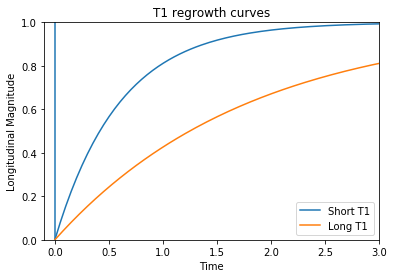

In [14]:
ts2 = np.linspace(0,5,200) #for 5 seconds
Mz = Mz_T1 (ts2,.6)
pl.plot(ts2,Mz,label = 'Short T1')
pl.axvline(x=0,ymin=0,ymax=1)
Mz1 = Mz_T1 (ts2,1.8)
pl.plot(ts2,Mz1,label = 'Long T1')
pl.xlim(-.1,3)
pl.ylim(0,1)

#pl.axvline(x=.5,ymin=0,ymax=1,color = 'black')
#pl.axvline(x=1,ymin=0,ymax=1,color = 'black')
pl.title('T1 regrowth curves')
pl.legend()
pl.xlabel('Time')
pl.ylabel('Longitudinal Magnitude')
pl.savefig('/Users/neuroimaging/Desktop/T1Curves.png',format='png',dpi=120)

pl.show()

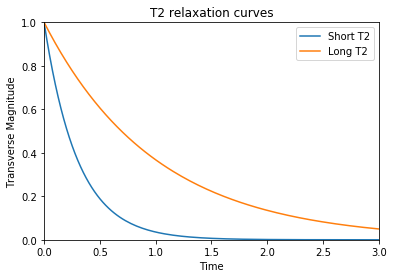

In [15]:
ts2 = np.linspace(0,5,200) #for 5 seconds
Mxy_a = Mxy_T2(ts2,1)
Mxy_b = Mxy_T2(ts2,.3)
pl.plot(ts2,Mxy_b,label = 'Short T2')
pl.plot(ts2,Mxy_a,label = 'Long T2')
#pl.axvline(x=0,ymin=0,ymax=1)
pl.xlim(0,3)
pl.ylim(0,1)

#pl.axvline(x=.5,ymin=0,ymax=1,color = 'black')
#pl.axvline(x=1,ymin=0,ymax=1,color = 'black')
pl.title('T2 relaxation curves')
pl.legend()
pl.xlabel('Time')
pl.ylabel('Transverse Magnitude')
pl.savefig('/Users/neuroimaging/Desktop/T2Curves.png',format='png',dpi=120)

pl.show()

# The phase accumulation 

In [16]:
def slopeline(m,b,x):
    return m*x + b

import scipy.integrate as integrate

#this is the equation integrated over to get F(t)
#this gives the gradient strength at time t if it moves from G0 = 1 by .25 every second
def GxMove(t):
    return 1 + .25*t

#before 180 degree pulse
def F1(tmin,x):
    Ft = []
    for t in x:
        Ft.append(integrate.quad(GxMove,tmin,t)[0])
    return Ft

#this gives the gradient strength at time t after the 180 degree pulse
#if it moves from G = G(tau) = by .25 every second
def GxMove2(t): 
    return ((1+.25*5) + .25*t) #the 1 + .25*5 is the Gx at the 180 degree pulse at 5 sceonds

#after 180 degree pulse
def F2(tmin,x):
    Ft = []
    for t in x: 
        Ft.append(integrate.quad(GxMove2,tmin,t)[0])
    return Ft

For the stationary spin, imaging it's located at G = 1, and it's on for 5 seconds before being flipped. 
$$F(\tau) = \int_0^\tau Gdt = \int_0^5 1dt = 5$$ 

so $2f = 2F(\tau) = 10$. that's the green line shown below. 

If though, we accumulate phase due to diffusing... imagine that the spin travels at a speed of +.25G per second (i.e. it travels the distance needed such that the gradient strength at it's changing position increases by .25 every second).

This means: 
$$F(\tau) = \int_0^\tau G(t)dt = \int_0^5 (1 + .25t) dt = 8.125$$ 

The phase accumulation before that 180 degree pulse is calculated with 
$$F(t)= \int_0^t G(t)dt$$

for the stationary particle, after the 180 degree pulse it simply regains its lost phase.

For the moving particle, the phase accumulation after the 180 degree pulse is 
$$F(\tau+5) = \int_\tau^{\tau+5} {G(\tau) + G(t) dt} =\int_\tau^{\tau+5} {(1+.25\tau) + .25t dt} $$. 
The figure below represents the accumulated phase and the $-2f$ accumulation at the 180 degree pulse and the influence of movemennt.


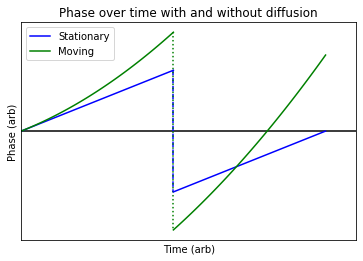

In [18]:
#stationary
x = np.linspace(0,5)
pl.plot(x,slopeline(1,0,x),color = 'blue',label = 'Stationary')
pl.hlines(0,-1,11)
pl.vlines(5,5,-5,linestyle = 'dashed',color = 'blue')
x2 = np.linspace(5,10)
pl.plot(x2,slopeline(1,-10,x2),color = 'blue')

#moving
pl.plot(x,F1(0,x),color = 'green',label = 'Moving')
pl.vlines(5,8.125,-8.125,linestyle = 'dotted',color = 'green')
x2 = np.linspace(5,10)
F2_shifted = [x-8.125 for x in F2(0,x)]
pl.plot(x2,F2_shifted,color = 'green')
pl.ylabel('Phase (arb)')
pl.xlabel('Time (arb)')
pl.xticks([]),pl.yticks([])
pl.xlim(0,11)
pl.legend()
pl.title('Phase over time with and without diffusion')
pl.savefig('/Users/neuroimaging/Desktop/DiffusionPhaseAccrual.png',format='png',dpi=120)

pl.show()